**Propensity model - The model that tries to predict the customer who has an intention or likelihood to buy the specific product.**

#### Bank Problem Statement

Understand why clients are not depositing as frequently as before. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

#### Data Science Problem Statement

Predict if the client will subscribe to a term deposit based on the analysis of the marketing campaigns the bank performed.

In [ ]:
# Import required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Source the data and Put into a Dataframe

In [ ]:
# Create Dataframe to read dataset
df = pd.read_csv("/content/bank-additional-full.csv", sep=";")

# Data Understanding

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Exploratory Data Analysis**
* Find Unwanted Columns
* Find Missing Values
* Find Features with one value
* Explore the Categorical Features
* Find Categorical Feature Distribution
* Relationship between Categorical Features and Target
* Explore the Numerical Features
* Find Continous Numerical Features
* Distribution of Continous Numerical Features
* Relation between Continous numerical Features and Target
* Find Outliers in numerical features
* Explore the Correlation between numerical features
* Find Pair Plot
* Check the Data set is balanced or not based on target values in classification

# Data Organization & Primary Cleaning

#### 0. Copy the Dataframe

In [ ]:
df_copy= df.copy()

##### 0.1 Find All Categorical and Numerical Columns

In [ ]:
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype=='O']
numerical_features  =  [feature for feature in df_copy.columns if df_copy[feature].dtype!='O']

#### 1. Find Duplicate

In [ ]:
duplicate = df[df.duplicated()]
duplicate

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


#### 1.1 Remove Duplicates

In [ ]:
df_copy.drop_duplicates(inplace=True)

In [ ]:
df_copy.shape

(41176, 21)

#### 2.0 Replace all occurrences of "unknown" replace with numpy not a number(NaN)



In [ ]:
df_copy = df_copy.replace({'unknown': np.nan})

#### 2.1 Find Missing Value

In [ ]:
df_copy.isna().sum()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(df_copy)

Your selected dataframe has 21 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
default,8596,20.9
education,1730,4.2
housing,990,2.4
loan,990,2.4
job,330,0.8
marital,80,0.2


#### 2.2 Missing Value Imputation

##### 2.2.1 Drop Missing Value if It's above Thrushhold Limit

In [ ]:
missing_df = missing_values_table(df_copy)
missing_columns = list(missing_df[missing_df['% of Total Values']>20].index)


Your selected dataframe has 21 columns.
There are 6 columns that have missing values.


In [ ]:
df_copy = df_copy.drop(columns=missing_columns)

##### 2.2.2 Impute Missing Value for Categorical Features

In [ ]:
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [ ]:
def impute_nan_categorical(df,columns):
  most_frequent_category = df[columns].mode()[0]
  df[columns].fillna(most_frequent_category,inplace=True)

In [ ]:
for feature in ['marital','education','housing','loan','job']:
  impute_nan_categorical(df_copy,feature)

##### 2.2.3 Impute Missing Value for Numerical Features

In [ ]:
def impute_nan_numerical(df,columns):
  mean_numerical_category = df[columns].mean()
  df[columns].fillna(mean_numerical_category,inplace=True)

In [ ]:
for feature in numerical_features:
  impute_nan_numerical(df_copy,feature)

#### 2.3 Find Features with One Value

In [ ]:
df_copy.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
for column in df_copy.columns:
  print(column,df_copy[column].nunique())

age 78
job 11
marital 3
education 7
housing 2
loan 2
contact 2
month 10
day_of_week 5
duration 1544
campaign 42
pdays 27
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 316
nr.employed 11
y 2


Features with a single value do not contribute to the learning process and can potentially introduce noise or unnecessary complexity.


##### 2.3.1 Features with Single Value Treatment

In [ ]:
df_copy.nunique()

age                 78
job                 11
marital              3
education            7
housing              2
loan                 2
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [ ]:
def drop_single_value_feature(df):
  unique_counts = df.nunique()
  single_value_feature = unique_counts[unique_counts == 1].index
  df.drop(single_value_feature,axis=1,inplace=True)


In [ ]:
drop_single_value_feature(df_copy)

# Feature Engineering

##### 3.0 Outlier Detection and Treatment

In [ ]:
numerical_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
def detect_outlier_iqr(df, columns=None, threshold=1.5):

  # Empty Dataframe
  outlier_df = pd.DataFrame(False, index=df.index, columns=columns)
  for column in columns:
    # Calculate quartiles and IQR
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1

    # Calculate the lower and upper bounds for Outlier
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    #print("For the Feature {} the Upper Bound is {} and Lower Bound is {}".format(column,upper_bound,lower_bound))

    outlier_df[column] = (df[column] < lower_bound) | (df[column]> upper_bound)


  return outlier_df




In [ ]:
detect_outlier_iqr(df_copy,numerical_features)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
41183,True,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_copy.shape

(41176, 20)

In [ ]:
def remove_outliers_irq(df,columns=None,threshold=1.5):
  outlier_df = detect_outlier_iqr(df,columns,threshold)
  # Remove Outlier using Boolean Indexing
  for column in columns:
    df = df[~outlier_df[column]]
  return df

In [ ]:
remove_outliers_irq(df_copy,numerical_features)

<ipython-input-206-d3fd5fca5e73>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outlier_df[column]]


,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,cellular,nov,fri,254,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
df_copy.shape

(41176, 20)

##### 3.1 Imbalanced Column Detection and Handle Imbalanced Data

In [ ]:
def detect_imbalace(df):
  imbalance_columns = []
  for column in df.columns:
    column_values = df[column]
    value_counts = column_values.value_counts(normalize=True)

    # Check if any value has a frequency greater than 60%
    if value_counts.max() > 0.6:
      imbalance_columns.append(column)
  return imbalance_columns


In [ ]:
detect_imbalace(df_copy)

['marital', 'loan', 'contact', 'pdays', 'previous', 'poutcome', 'y']

In [ ]:
df_copy.y.value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
def handle_imbalance(df,target_column):
  # Seperate the features and the target variable
  X = df.drop(target_column,axis=1)
  y = df[target_column]

  # Instantiate both Under and Over Sampler Class
  under_sampler = RandomUnderSampler()
  over_sampler = RandomOverSampler()

  # Resample the data
  X_resampled, y_resampled = under_sampler.fit_resample(X,y)
  X_resampled, y_resampled = over_sampler.fit_resample(X,y)

  # Create a new balanced Dataframe
  balanced_df = X_resampled.copy()
  balanced_df[target_column] = y_resampled

  return balanced_df




In [ ]:
handle_imbalance(df_copy,'y')['y'].value_counts()

no     36537
yes    36537
Name: y, dtype: int64

# Data Transformation

##### 4.0 Handling Categorical Data

In [ ]:
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [ ]:
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype=='O']

In [ ]:
for column in categorical_features:
  print(column + " : --> \n", df_copy[column].unique())
  print(" Total Number of Categories:  ", df_copy[column].nunique())


job : --> 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
 Total Number of Categories:   11
marital : --> 
 ['married' 'single' 'divorced']
 Total Number of Categories:   3
education : --> 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
 Total Number of Categories:   7
housing : --> 
 ['no' 'yes']
 Total Number of Categories:   2
loan : --> 
 ['no' 'yes']
 Total Number of Categories:   2
contact : --> 
 ['telephone' 'cellular']
 Total Number of Categories:   2
month : --> 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
 Total Number of Categories:   10
day_of_week : --> 
 ['mon' 'tue' 'wed' 'thu' 'fri']
 Total Number of Categories:   5
poutcome : --> 
 ['nonexistent' 'failure' 'success']
 Total Number of Categories:   3
y : --> 
 ['no' 'yes']
 Total Number of Categories:   2


In [ ]:
def one_hot_encoding(df,categorical_cols):
  encoded_df = pd.get_dummies(df,columns=categorical_cols,drop_first=True)
  return encoded_df

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df, categorical_cols):
    encoded_df = df.copy()
    label_encoder = LabelEncoder()
    for col in categorical_cols:
        encoded_df[col] = label_encoder.fit_transform(encoded_df[col])
    return encoded_df

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

def ordinal_encoding(df, categorical_cols):
    encoded_df = df.copy()
    ordinal_encoder = OrdinalEncoder()
    encoded_df[categorical_cols] = ordinal_encoder.fit_transform(encoded_df[categorical_cols])
    return encoded_df


In [ ]:
#!pip install category_encoders

In [ ]:
# target Encoding
import category_encoders as ce

def target_encoding(df, categorical_cols, target_col):
    encoded_df = df.copy()
    target_encoder = ce.TargetEncoder(cols=categorical_cols)
    encoded_df[categorical_cols] = target_encoder.fit_transform(encoded_df[categorical_cols], encoded_df[target_col])
    return encoded_df

In [ ]:
df_copy['y'].replace({'no': 0, 'yes': 1}, inplace=True)

In [ ]:
lst = ['marital', 'housing', 'loan', 'poutcome', 'contact']
encoded_df = one_hot_encoding(df_copy, lst)

In [ ]:
lst = ['month']
encoded_df = label_encoding(encoded_df,lst)

In [ ]:
lst = ['day_of_week']
encoded_df = ordinal_encoding(encoded_df,lst)

In [ ]:
lst = ['job', 'education']
encoded_df = target_encoding(encoded_df,lst,'y')

In [ ]:
encoded_df.head()

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,...,euribor3m,nr.employed,y,marital_married,marital_single,housing_yes,loan_yes,poutcome_nonexistent,poutcome_success,contact_telephone
0,56,0.100000,0.102490,6,1.0,261,1,999,0,1.1,...,4.857,5191.0,0,1,0,0,0,1,0,1
1,57,0.081422,0.108389,6,1.0,149,1,999,0,1.1,...,4.857,5191.0,0,1,0,0,0,1,0,1
2,37,0.081422,0.108389,6,1.0,226,1,999,0,1.1,...,4.857,5191.0,0,1,0,1,0,1,0,1
3,40,0.129128,0.082060,6,1.0,151,1,999,0,1.1,...,4.857,5191.0,0,1,0,0,0,1,0,1
4,56,0.081422,0.108389,6,1.0,307,1,999,0,1.1,...,4.857,5191.0,0,1,0,0,1,1,0,1


##### 4.1 Feature Scaling / Data Normalization / Data standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def min_max_scaling(df):
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(df)
  scaled_df = pd.DataFrame(scaled_data,columns=df.columns)
  return scaled_df

In [ ]:
from sklearn.preprocessing import StandardScaler

def z_score_normalization(df):
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(df)
  scaled_df = pd.DataFrame(scaled_data,columns=df.columns)
  return scaled_df

In [ ]:
scaled_df_z_score = z_score_normalization(encoded_df)

In [ ]:
scaled_df_min_max_score = min_max_scaling(encoded_df)

In [ ]:
scaled_df_min_max_score.head()

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,...,euribor3m,nr.employed,y,marital_married,marital_single,housing_yes,loan_yes,poutcome_nonexistent,poutcome_success,contact_telephone
0,0.481481,0.126559,0.289528,0.666667,0.25,0.053070,0.0,1.0,0.0,0.9375,...,0.957379,0.859735,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.493827,0.050833,0.359975,0.666667,0.25,0.030297,0.0,1.0,0.0,0.9375,...,0.957379,0.859735,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.246914,0.050833,0.359975,0.666667,0.25,0.045954,0.0,1.0,0.0,0.9375,...,0.957379,0.859735,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.283951,0.245288,0.045545,0.666667,0.25,0.030704,0.0,1.0,0.0,0.9375,...,0.957379,0.859735,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.481481,0.050833,0.359975,0.666667,0.25,0.062424,0.0,1.0,0.0,0.9375,...,0.957379,0.859735,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0


In [ ]:
scaled_df_z_score.head()

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,...,euribor3m,nr.employed,y,marital_married,marital_single,housing_yes,loan_yes,poutcome_nonexistent,poutcome_success,contact_telephone
0,1.533143,-0.262185,-0.472164,0.762504,-0.718775,0.010352,-0.565963,0.195443,-0.349551,0.648101,...,0.712463,0.331695,-0.356325,0.804347,-0.624914,-1.100899,-0.422945,0.397773,-0.185728,1.318174
1,1.629107,-0.646852,-0.197642,0.762504,-0.718775,-0.421577,-0.565963,0.195443,-0.349551,0.648101,...,0.712463,0.331695,-0.356325,0.804347,-0.624914,-1.100899,-0.422945,0.397773,-0.185728,1.318174
2,-0.290177,-0.646852,-0.197642,0.762504,-0.718775,-0.124626,-0.565963,0.195443,-0.349551,0.648101,...,0.712463,0.331695,-0.356325,0.804347,-0.624914,0.908348,-0.422945,0.397773,-0.185728,1.318174
3,-0.002284,0.340924,-1.422927,0.762504,-0.718775,-0.413864,-0.565963,0.195443,-0.349551,0.648101,...,0.712463,0.331695,-0.356325,0.804347,-0.624914,-1.100899,-0.422945,0.397773,-0.185728,1.318174
4,1.533143,-0.646852,-0.197642,0.762504,-0.718775,0.187751,-0.565963,0.195443,-0.349551,0.648101,...,0.712463,0.331695,-0.356325,0.804347,-0.624914,-1.100899,2.364375,0.397773,-0.185728,1.318174


##### 5.0 Feature Selection

In [ ]:
scaled_df_z_score.corr()['y'].sort_values(ascending=False)

y                       1.000000
duration                0.405297
poutcome_success        0.316302
previous                0.230202
job                     0.152751
education               0.068153
cons.conf.idx           0.054802
marital_single          0.054209
age                     0.030381
day_of_week             0.015970
housing_yes             0.011145
loan_yes               -0.004478
month                  -0.006051
marital_married        -0.043044
campaign               -0.066361
cons.price.idx         -0.136134
contact_telephone      -0.144774
poutcome_nonexistent   -0.193522
emp.var.rate           -0.298289
euribor3m              -0.307740
pdays                  -0.324948
nr.employed            -0.354669
Name: y, dtype: float64

<Axes: >

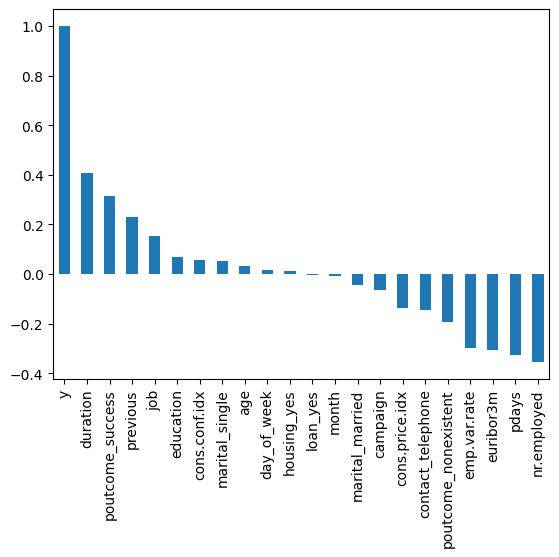

In [ ]:
scaled_df_z_score.corr()['y'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

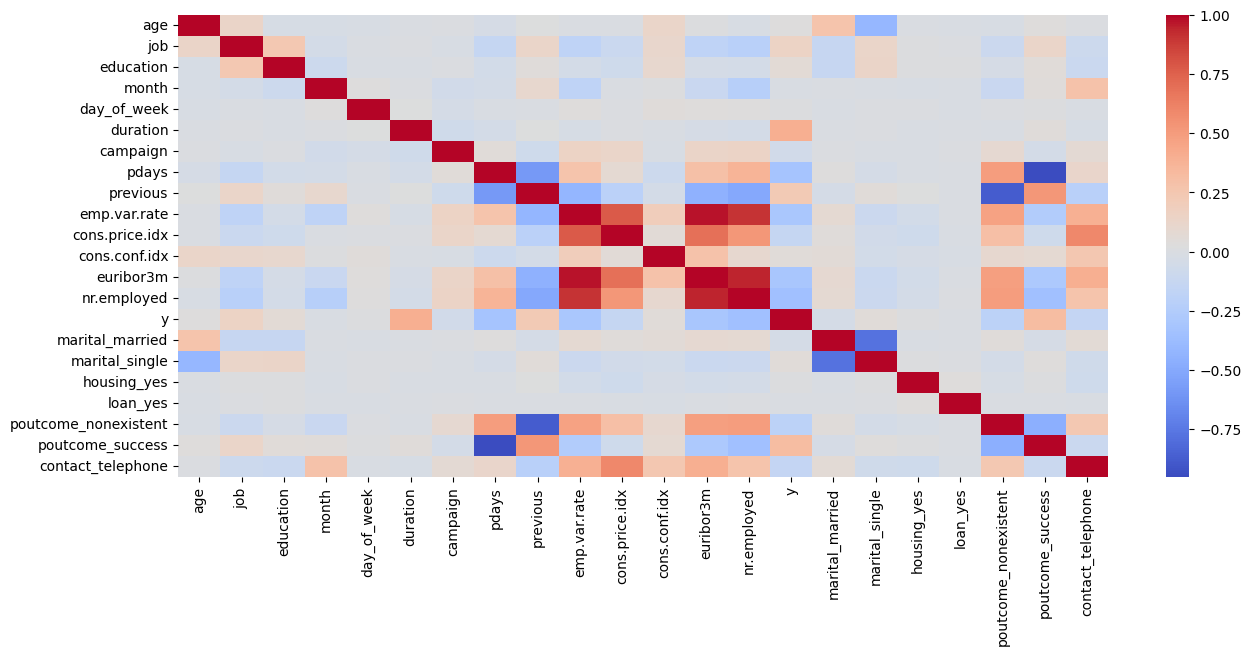

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(scaled_df_z_score.corr(),cmap='coolwarm')

<Axes: >

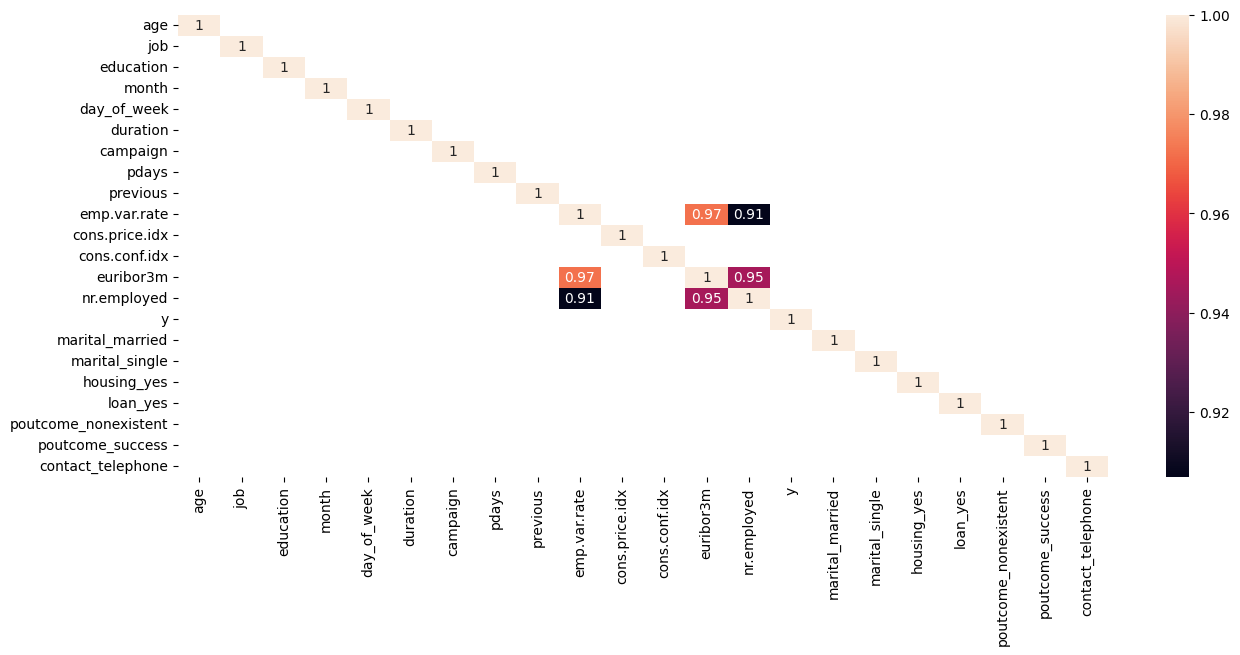

In [ ]:
plt.figure(figsize=(15,6))
df_corr = scaled_df_z_score.corr()
sns.heatmap(df_corr[df_corr>0.8],annot=True)

In [ ]:
### Chi-Square Test

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:
X = scaled_df_min_max_score.iloc[:,:-1]
y = scaled_df_min_max_score['y']

In [ ]:
rank_features = SelectKBest(score_func=chi2,k=20)
fit_rank = rank_features.fit(X,y)
df_score = pd.DataFrame(fit_rank.scores_,columns=["Scores"])
df_column = pd.DataFrame(X.columns)
df_info = pd.concat([df_column,df_score], axis=1)
df_info.columns=['Features','Scores']
df_info.sort_values(by='Scores', ascending=False)

,Features,Scores
14,y,36537.000000
20,poutcome_success,3982.157956
12,euribor3m,890.235155
9,emp.var.rate,540.921063
13,nr.employed,502.482724
8,previous,441.387744
5,duration,357.984549
19,poutcome_nonexistent,210.661297
1,job,208.973924
7,pdays,158.015941


In [ ]:
df_info.nlargest(11,'Scores')

,Features,Scores
14,y,36537.000000
20,poutcome_success,3982.157956
12,euribor3m,890.235155
9,emp.var.rate,540.921063
13,nr.employed,502.482724
8,previous,441.387744
5,duration,357.984549
19,poutcome_nonexistent,210.661297
1,job,208.973924
7,pdays,158.015941


##### 6.0 Feature Extraction (PCA)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
def perform_PCA (df,n_components):
  # Standardize the data
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(df)

  # Perform PCA
  pca = PCA(n_components=n_components)
  pricipal_components = pca.fit_transform(scaled_data)

  # Create New Dataframe
  principal_df = pd.DataFrame(data=pricipal_components, columns=['PCA-{}'.format(i+1) for i in range(n_components)])

  # Explained Variance ratio
  exp_variance = pca.explained_variance_ratio_

  return principal_df, exp_variance

In [ ]:
scaled_df_min_max_score.head()

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,...,euribor3m,nr.employed,y,marital_married,marital_single,housing_yes,loan_yes,poutcome_nonexistent,poutcome_success,contact_telephone
0,0.481481,0.126559,0.289528,0.666667,0.25,0.053070,0.0,1.0,0.0,0.9375,...,0.957379,0.859735,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.493827,0.050833,0.359975,0.666667,0.25,0.030297,0.0,1.0,0.0,0.9375,...,0.957379,0.859735,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.246914,0.050833,0.359975,0.666667,0.25,0.045954,0.0,1.0,0.0,0.9375,...,0.957379,0.859735,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.283951,0.245288,0.045545,0.666667,0.25,0.030704,0.0,1.0,0.0,0.9375,...,0.957379,0.859735,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.481481,0.050833,0.359975,0.666667,0.25,0.062424,0.0,1.0,0.0,0.9375,...,0.957379,0.859735,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0


In [ ]:
perform_PCA(scaled_df_min_max_score,4)

(          PCA-1     PCA-2     PCA-3     PCA-4
 0     -1.700869  1.647015 -0.829877 -0.342444
 1     -1.749351  1.629740 -0.878437 -0.471512
 2     -1.671494  1.036624 -0.328667 -0.814513
 3     -1.692669  1.287216 -0.462322 -0.990477
 4     -1.722091  1.601512 -0.816105 -0.290869
 ...         ...       ...       ...       ...
 41171  2.293841  0.542676 -1.916281  1.686342
 41172  1.193108 -0.358248 -1.797075 -1.576737
 41173  1.686952 -0.356592 -1.498977  0.624913
 41174  1.908061 -0.026311 -1.334871 -0.279030
 41175  3.184980  1.215911 -1.835547 -0.215637
 
 [41176 rows x 4 columns],
 array([0.23126143, 0.09880646, 0.08985948, 0.06610866]))